In [ ]:
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Financial Data and Preprocessing 

## Getting data from Yahoo Finance

1. Import the libraries:

In [ ]:
!pip install yfinance

Method 1: use yfinance

In [ ]:
import pandas as pd 
import yfinance as yf

2. Download the data:

In [ ]:
df_yahoo = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2010-12-31',
                       progress=False)

- We can pass a list of multiple tickers, such as ['AAPL', 'MSFT'].
- We can set auto_adjust=True to download only the adjusted prices.
- We can additionally download dividends and stock splits by
setting actions='inline'.
- Setting progress=False disables the progress bar.

3. Inspect the data:

In [ ]:
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')

df_yahoo.head()

Downloaded 2766 rows of data.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.460857,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.169071,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.215448,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.937188,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,3.076317,115183600


Method 2: use yahoo_fin

In [ ]:
!pip install yahoo_fin
!pip install requests_html

In [ ]:
from yahoo_fin.stock_info import get_data
df= get_data("AAPL",start_date = '01/01/2000',end_date='31/12/2010',
                      index_as_date = True, interval="1d")
df

,open,high,low,close,adjclose,volume,ticker
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.460857,133949200,AAPL
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.169071,128094400,AAPL
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.215448,194580400,AAPL
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.937188,191993200,AAPL
2000-01-07,3.446429,3.607143,3.410714,3.553571,3.076317,115183600,AAPL
...,...,...,...,...,...,...,...
2010-12-23,46.428570,46.450001,46.167141,46.228573,40.019943,55789300,AAPL
2010-12-27,46.121429,46.491428,45.931427,46.382858,40.153526,62454000,AAPL
2010-12-28,46.558571,46.665714,46.437141,46.495716,40.251225,43981000,AAPL
2010-12-29,46.602856,46.635715,46.442856,46.470001,40.228962,40784800,AAPL


## Getting data from Quandl 

1. Import the libraries:

In [ ]:
!pip install quandl

In [ ]:
import pandas as pd 
import quandl

2. Authenticate using the personal API key:

In [ ]:
QUANDL_KEY = 'yz7qGzikAuQL9wn7rrX-' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

3. Download the data:

In [ ]:
df_quandl = quandl.get(dataset=['WIKI/AAPL','WIKI/MSFT'],
                       start_date='2000-01-01', 
                       end_date='2010-12-31')

4. Inspect the data:

In [ ]:
print(f'Downloaded {df_quandl.shape[0]} rows of data.')

df_quandl.head()

Downloaded 2767 rows of data.


,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,WIKI/AAPL - Adj. Close,WIKI/AAPL - Adj. Volume,WIKI/MSFT - Open,WIKI/MSFT - High,WIKI/MSFT - Low,WIKI/MSFT - Close,WIKI/MSFT - Volume,WIKI/MSFT - Ex-Dividend,WIKI/MSFT - Split Ratio,WIKI/MSFT - Adj. Open,WIKI/MSFT - Adj. High,WIKI/MSFT - Adj. Low,WIKI/MSFT - Adj. Close,WIKI/MSFT - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0,117.37,118.62,112.00,116.56,26614200.0,0.0,1.0,39.066089,39.482146,37.278708,38.796484,53228400.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0,113.56,117.12,112.25,112.62,27059500.0,0.0,1.0,37.797947,38.982878,37.361920,37.485073,54119000.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0,111.12,116.37,109.37,113.81,32029800.0,0.0,1.0,36.985804,38.733244,36.403324,37.881159,64059600.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0,112.19,113.87,108.37,110.00,27488300.0,0.0,1.0,37.341949,37.901130,36.070479,36.613017,54976600.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0,108.62,112.25,107.31,111.44,31006800.0,0.0,1.0,36.153690,37.361920,35.717662,37.092315,62013600.0


## Getting data from Intrinio

1. Import the libraries:

In [ ]:
!pip install intrinio_sdk

     |████████████████████████████████| 757kB 4.3MB/s 


In [ ]:
import intrinio_sdk
import pandas as pd

2. Authenticate using the personal API key and select the API:

In [ ]:
intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OmQzNzI2ZWU3MGQ2NjE2N2M4M2ZiZWQ1N2Q0NjZmMDdj'  # replace {key} with your own API key  
security_api = intrinio_sdk.SecurityApi()

3. Request the data:

In [ ]:
r = security_api.get_security_stock_prices(identifier='AAPL', 
                                           start_date='2000-01-01',
                                           end_date='2010-12-31', 
                                           frequency='daily',
                                           page_size=10000)

- identifier: Stock ticker or another acceptable identifier.
- start_date/end_date: This is self-explanatory.
- frequency: Which data frequency is of interest to us (available choices: daily,
weekly, monthly, quarterly, or yearly).
- page_size: Defines the number of observations to return on one page; we set it
to a high number to collect all data in one request with no need for
the next_page token

4. Convert the results into a DataFrame:

In [ ]:
response_list = [x.to_dict() for x in r.stock_prices]
df_intrinio = pd.DataFrame(response_list).sort_values('date')
df_intrinio.set_index('date', inplace=True)

5. Inspect the data:

In [ ]:
print(f'Downloaded {df_intrinio.shape[0]} rows of data.')

df_intrinio.head()

Downloaded 2770 rows of data.


,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,
2000-01-03,False,daily,104.87,112.50,101.69,111.94,4783900.0,3.242344,3.478247,3.144026,3.460933,133949200.0
2000-01-04,False,daily,108.25,110.62,101.19,102.50,4574800.0,3.346846,3.420122,3.128567,3.169069,128094400.0
2000-01-05,False,daily,103.75,110.56,103.00,104.00,6949300.0,3.207717,3.418266,3.184528,3.215446,194580400.0
2000-01-06,False,daily,106.12,107.00,95.00,95.00,6856900.0,3.280992,3.308199,2.937186,2.937186,191993200.0
2000-01-07,False,daily,96.50,101.00,95.50,99.50,4113700.0,2.983563,3.122693,2.952645,3.076316,115183600.0


Method 2 (suitable for get technical data)

In [ ]:
import requests
import pandas as pd
from pandas.io.json import json_normalize

BASE_URL = 'https://api-v2.intrinio.com'

# REPLACE YOUR INTRINIO API KEY HERE!
INTRINIO_API_KEY = 'OmQzNzI2ZWU3MGQ2NjE2N2M4M2ZiZWQ1N2Q0NjZmMDdj' 

def query_intrinio(path, **kwargs):   
    url = '%s%s'%(BASE_URL, path)
    kwargs['api_key'] = INTRINIO_API_KEY
    response = requests.get(url, params=kwargs)

    status_code = response.status_code
    if status_code == 401: 
        raise Exception('API key is invalid!')
    if status_code == 429: 
        raise Exception('Page limit hit! Try again in 1 minute')
    if status_code != 200: 
        raise Exception('Request failed with status %s'%status_code)

    return response.json()

def get_technicals(ticker, indicator, **kwargs):    
    url_pattern = '/securities/%s/prices/technicals/%s'
    path = url_pattern%(ticker, indicator)
    json_data = query_intrinio(path, **kwargs)

    df = json_normalize(json_data.get('technicals'))    
    df['date_time'] = pd.to_datetime(df['date_time'])
    df = df.set_index('date_time')
    df.index = df.index.rename('date')
    return df
    
def get_prices(ticker, tag, **params):
    url_pattern = '/securities/%s/historical_data/%s'
    path = url_pattern%(ticker, tag)
    json_data = query_intrinio(path, **params)

    df = json_normalize(json_data.get('historical_data'))    
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df.index = df.index.rename('date')
    return df.rename(columns={'value':tag})

In [ ]:
ticker = 'AAPL'
query_params = {'start_date': '2000-01-01', 
                'end_date': '2010-12-31', 
                'page_size': 365*6} 

In [ ]:
df_close = get_prices(ticker, 'adj_close_price', **query_params)

In [ ]:
df_close

## Converting prices to returns

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download the data and keep the adjusted close prices only:

In [ ]:
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
2000-01-03,3.460857
2000-01-04,3.169071
2000-01-05,3.215448
2000-01-06,2.937188
2000-01-07,3.076317
...,...
2010-12-23,40.019943
2010-12-27,40.153526
2010-12-28,40.251225


3. Convert adjusted close prices to simple and log returns:

In [ ]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

4. Inspect the output:

Asset prices are usually non-stationary, that is, their statistics, such as mean and variance
(mathematical moments) change over time. This could also mean observing some trends or
seasonality in the price series (see Chapter 3, Time Series Modeling). By transforming the
prices into returns, we attempt to make the time series stationary, which is the desired
property in statistical modeling.

Simple returns: They aggregate over assets; the simple return of a portfolio is the
weighted sum of the returns of the individual assets in the portfolio. Simple
returns are defined as:

Log returns: They aggregate over time; it is easier to understand with the help
of an example—the log return for a given month is the sum of the log returns of
the days within that month. Log returns are defined as:

In [ ]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,3.460857,NaN,NaN
2000-01-04,3.169071,-0.084310,-0.088078
2000-01-05,3.215448,0.014634,0.014528
2000-01-06,2.937188,-0.086539,-0.090514
2000-01-07,3.076317,0.047368,0.046280


In [ ]:
df.describe()

,adj_close,simple_rtn,log_rtn
count,2766.000000,2765.000000,2765.000000
mean,9.715720,0.001393,0.000885
std,9.985330,0.030979,0.032484
min,0.811282,-0.518692,-0.731247
25%,1.416652,-0.014721,-0.014831
50%,5.314764,0.000948,0.000947
75%,15.758786,0.017029,0.016886
max,40.251225,0.139049,0.130194


### There's more

1. Import libraries and authenticate:

In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
import quandl

QUANDL_KEY = 'yz7qGzikAuQL9wn7rrX-' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

yz7qGzikAuQL9wn7rrX-

2. Create a DataFrame with all possible dates and left join the prices on it:

In [ ]:
df[['adj_close']]

,adj_close
Date,
2000-01-03,3.460857
2000-01-04,3.169071
2000-01-05,3.215448
2000-01-06,2.937188
2000-01-07,3.076317
...,...
2010-12-23,40.019943
2010-12-27,40.153526
2010-12-28,40.251225


In [ ]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31', 
                                                end='2010-12-31'))
df_all_dates

""
1999-12-31
2000-01-01
2000-01-02
2000-01-03
2000-01-04
...
2010-12-27
2010-12-28
2010-12-29
2010-12-30


In [ ]:
df_all_dates.join(df[['adj_close']], how='left')

,adj_close
1999-12-31,NaN
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,3.460857
2000-01-04,3.169071
...,...
2010-12-27,40.153526
2010-12-28,40.251225
2010-12-29,40.228962
2010-12-30,40.027370


In [ ]:
df_all_dates.join(df[['adj_close']], how='left') \
                 .fillna(method='ffill') 

,adj_close
1999-12-31,NaN
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,3.460857
2000-01-04,3.169071
...,...
2010-12-27,40.153526
2010-12-28,40.251225
2010-12-29,40.228962
2010-12-30,40.027370


30/11/2010: 38.480263 will fill to all day in month 12 (ffill)

In [ ]:
df = df_all_dates.join(df[['adj_close']], how='left') \
                 .fillna(method='ffill') \
                 .asfreq('M')
df

,adj_close
1999-12-31,NaN
2000-01-31,3.207718
2000-02-29,3.543948
2000-03-31,4.199018
2000-04-30,3.835737
...,...
2010-08-31,30.064436
2010-09-30,35.091660
2010-10-31,37.222515
2010-11-30,38.480263


We used a left join, which is a type of join (used for merging DataFrames) that
returns all rows from the left table and the matched rows from the right table
while leaving the unmatched rows empty. In case the last day of the month was
not a trading day, we used the last known price of that month
(fillna(method='ffill')). Lastly, we selected the end-of-month rows only by
applying asfreq('M').

3. Download inflation data from Quandl:

In [ ]:
df_cpi = quandl.get(dataset='RATEINF/CPI_USA', 
                    start_date='1999-12-01', 
                    end_date='2010-12-31'
                    )
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)
df_cpi

,cpi
Date,
1999-12-31,168.300
2000-01-31,168.800
2000-02-29,169.800
2000-03-31,171.200
2000-04-30,171.300
...,...
2010-08-31,218.312
2010-09-30,218.439
2010-10-31,218.711


4. Merge inflation data to prices:

df: AAPL

In [ ]:
df_merged = df.join(df_cpi, how='left')
df_merged

,adj_close,cpi
1999-12-31,NaN,168.300
2000-01-31,3.207718,168.800
2000-02-29,3.543948,169.800
2000-03-31,4.199018,171.200
2000-04-30,3.835737,171.300
...,...,...
2010-08-31,30.064436,218.312
2010-09-30,35.091660,218.439
2010-10-31,37.222515,218.711
2010-11-30,38.480263,218.803


5. Calculate simple returns and inflation rate:

In [ ]:
df_merged['simple_rtn'] = df_merged.adj_close.pct_change() # simple return
df_merged['inflation_rate'] = df_merged.cpi.pct_change()
df_merged

,adj_close,cpi,simple_rtn,inflation_rate
1999-12-31,NaN,168.300,NaN,NaN
2000-01-31,3.207718,168.800,NaN,0.002971
2000-02-29,3.543948,169.800,0.104819,0.005924
2000-03-31,4.199018,171.200,0.184842,0.008245
2000-04-30,3.835737,171.300,-0.086516,0.000584
...,...,...,...,...
2010-08-31,30.064436,218.312,-0.055005,0.001381
2010-09-30,35.091660,218.439,0.167215,0.000582
2010-10-31,37.222515,218.711,0.060723,0.001245
2010-11-30,38.480263,218.803,0.033790,0.000421


6. Adjust returns for inflation:

In [ ]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
1999-12-31,NaN,168.3,NaN,NaN,NaN
2000-01-31,3.207718,168.8,NaN,0.002971,NaN
2000-02-29,3.543948,169.8,0.104819,0.005924,0.098313
2000-03-31,4.199018,171.2,0.184842,0.008245,0.175153
2000-04-30,3.835737,171.3,-0.086516,0.000584,-0.087049


## Changing frequency

0. Obtain the simple returns in case of starting in this recipe:

In [ ]:
import pandas as pd 
import numpy as np
import yfinance as yf

# download data 
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31', 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

,log_rtn
Date,
2000-01-04,-0.088078
2000-01-05,0.014528
2000-01-06,-0.090514
2000-01-07,0.046280
2000-01-10,-0.017744


In [ ]:
df.to_csv('df.csv')

1. Import the libraries:

2. Define the function for calculating the realized volatility:

The general rule of thumb for changing frequency can be broken down into the following:
Multiply/divide the log returns by the number of time periods.

Multiply/divide the volatility by the square root of the number of time periods.

In [ ]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility:

In [ ]:
df.apply(realized_volatility)

log_rtn    1.708441
dtype: float64

In [ ]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
df_rv
# explain: áp dụng x**2 cho tất cả giá trị theo từng ngày, sau đó 
#sum toàn bộ giá trị này lại theo tháng rồi lấy sqrt

,rv
Date,
2000-01-31,0.236247
2000-02-29,0.147840
2000-03-31,0.243593
2000-04-30,0.212513
2000-05-31,0.184989
...,...
2010-08-31,0.060304
2010-09-30,0.065953
2010-10-31,0.069618


4. Annualize the values:

In [ ]:
df_rv.rv = df_rv.rv * np.sqrt(12)
df_rv

,rv
Date,
2000-01-31,0.818383
2000-02-29,0.512134
2000-03-31,0.843830
2000-04-30,0.736167
2000-05-31,0.640822
...,...
2010-08-31,0.208900
2010-09-30,0.228469
2010-10-31,0.241164


5. Plot the results:

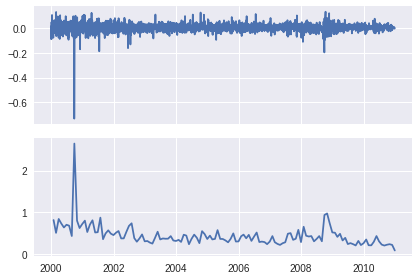

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv) # realized volatility

plt.tight_layout()
# plt.savefig('images/ch1_im6.png')
plt.show()

We can see that the spikes in the realized volatility coincide with some extreme
returns (which might be outliers).

Normally, we could use the resample method of a pandas DataFrame. Supposing we
wanted to calculate the average monthly return, we could run
df.log_rtn.resample('M').mean().
For the resample method, we can use any built-in aggregate functions of pandas, such as
mean, sum, min, and max. However, our case is a bit more complex, so we defined a helper
function called realized_volatility, and replicated the behavior of resample by using
a combination of groupby, Grouper, and apply.
We presented the most basic visualization of the results (please refer to the next recipe for
information about visualizing time series).

## Visualizing time series data

### Getting ready

In [ ]:
import pandas as pd 
import numpy as np
import yfinance as yf

# download data as pandas DataFrame
df = yf.download('MSFT', auto_adjust = False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# create simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# dropping NA's in the first row
df.dropna(how = 'any', inplace = True)
df

,adj_close,simple_rtn,log_rtn
Date,,,
1986-03-14,0.064427,0.035715,0.035092
1986-03-17,0.065537,0.017242,0.017095
1986-03-18,0.063871,-0.025424,-0.025753
1986-03-19,0.062760,-0.017391,-0.017544
1986-03-20,0.061094,-0.026549,-0.026908
...,...,...,...
2020-07-16,203.919998,-0.019804,-0.020003
2020-07-17,202.880005,-0.005100,-0.005113
2020-07-20,211.600006,0.042981,0.042083


### How to do it...

#### the `plot` method of pandas

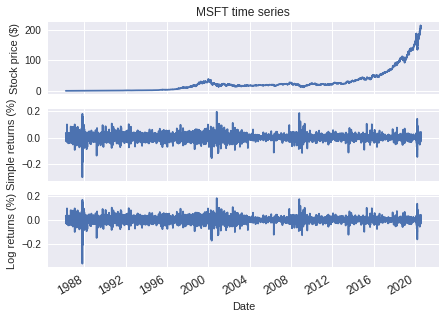

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT time series',
          ylabel = 'Stock price ($)')
    
# add simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
          ylabel = 'Log returns (%)')

ax[2].tick_params(axis='x', 
                  which='major', 
                  labelsize=12)

# plt.tight_layout()
# plt.savefig('images/ch1_im7.png')
plt.show()

The resulting plot contains three axes. Each one of them presents a different series: raw
prices, simple returns, and log returns. Inspecting the plot in such a setting enables us to see
the periods of heightened volatility and what was happening at the same time with the
price of Microsoft's stock. Additionally, we see how similar simple and log returns are

#### `plotly` + `cufflinks`

1. Import the libraries and handle the settings:

In [ ]:
! pip install chart_studio

In [ ]:
#import cufflinks as cf
#from plotly.offline import iplot, init_notebook_mode

# set up settings (run it once)
#cf.set_config_file(world_readable=True, theme='pearl', 
                    #offline=True
                #   )

# initialize notebook display
#init_notebook_mode()

In [ ]:
#%reload_ext autoreload
#%autoreload 2

2. Create the plots:

By using cufflinks, we can use the iplot method directly on a pandas DataFrame. To
create the previous plot, we used subplots (subplots=True), specified the shape of the
figure (shape=(3,1)), indicated that the plots share the x-axis (shared_xaxes=True), and
added the title (title='MSFT time series'). By default, the selected type of plot is
a line chart (kind='line').

In [ ]:
#df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')

## Identifying outliers

### 3 sigma method

0: Repeat the steps from recipe *Converting prices to returns*:

In [ ]:
import pandas as pd 
import yfinance as yf

In [ ]:
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df

,adj_close
Date,
2000-01-03,3.460857
2000-01-04,3.169071
2000-01-05,3.215448
2000-01-06,2.937188
2000-01-07,3.076317
...,...
2010-12-23,40.019943
2010-12-27,40.153526
2010-12-28,40.251225


In [ ]:
df['simple_rtn'] = df.adj_close.pct_change()

In [ ]:
df[:23]

,adj_close,simple_rtn
Date,,
2000-01-03,3.460857,NaN
2000-01-04,3.169071,-0.084310
2000-01-05,3.215448,0.014634
2000-01-06,2.937188,-0.086539
2000-01-07,3.076317,0.047368
2000-01-10,3.022212,-0.017588
2000-01-11,2.867623,-0.051151
2000-01-12,2.695642,-0.059973
2000-01-13,2.991294,0.109678


1. Calculate the rolling mean and standard deviation:

In [ ]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()
df_rolling[:23]
# rooling: lấy 21 giá trị liền trước tính luôn giá trị hiện tại
# Nếu có giá trị nào cao hơn giá trị hiện tại trong rolling windown thì giá trị hiện tại có thể
# không phải outlier. Do đó nên tìm base line 3 sigma không có outlier để phán xét sẽ tốt hơn 
#(cập nhật theo thời gian)

,mean,std
Date,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
2000-01-10,NaN,NaN
2000-01-11,NaN,NaN
2000-01-12,NaN,NaN
2000-01-13,NaN,NaN


2. Join the rolling metrics to the original data:

In [ ]:
df_outliers = df.join(df_rolling)
df_outliers

,adj_close,simple_rtn,mean,std
Date,,,,
2000-01-03,3.460857,NaN,NaN,NaN
2000-01-04,3.169071,-0.084310,NaN,NaN
2000-01-05,3.215448,0.014634,NaN,NaN
2000-01-06,2.937188,-0.086539,NaN,NaN
2000-01-07,3.076317,0.047368,NaN,NaN
...,...,...,...,...
2010-12-23,40.019943,-0.004798,0.002274,0.008078
2010-12-27,40.153526,0.003338,0.001496,0.007040
2010-12-28,40.251225,0.002433,0.001582,0.007040


3. Define a function for detecting outliers:

In [ ]:
def indentify_outliers(row, n_sigmas=3):
    '''
    Function for identifying the outliers using the 3 sigma rule. 
    The row must contain the following columns/indices: simple_rtn, mean, std.
    
    Parameters
    ----------
    row : pd.Series
        A row of a pd.DataFrame, over which the function can be applied.
    n_sigmas : int
        The number of standard deviations above/below the mean - used for detecting outliers
        
    Returns
    -------
    0/1 : int
        An integer with 1 indicating an outlier and 0 otherwise.
    '''
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0 
    # explain: nếu simple_return hiện tại nằm ngoài 3 sigma của 20 ngày gần kề (1 tháng) thì đó là outlier

4. Identify the outliers and extract their values for later use:

In [ ]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)
df_outliers

,adj_close,simple_rtn,mean,std,outlier
Date,,,,,
2000-01-03,3.460857,NaN,NaN,NaN,0
2000-01-04,3.169071,-0.084310,NaN,NaN,0
2000-01-05,3.215448,0.014634,NaN,NaN,0
2000-01-06,2.937188,-0.086539,NaN,NaN,0
2000-01-07,3.076317,0.047368,NaN,NaN,0
...,...,...,...,...,...
2010-12-23,40.019943,-0.004798,0.002274,0.008078,0
2010-12-27,40.153526,0.003338,0.001496,0.007040,0
2010-12-28,40.251225,0.002433,0.001582,0.007040,0


In [ ]:
outliers = df_outliers.loc[df_outliers['outlier'] == 1, 
                           ['simple_rtn']]
outliers

,simple_rtn
Date,
2000-09-29,-0.518692
2000-12-06,-0.158088
2001-07-18,-0.171713
2002-06-19,-0.150372
2003-04-11,-0.081420
2003-05-05,0.113495
2004-04-15,0.099850
2004-07-15,0.113253
2004-10-14,0.131572


5. Plot the results: 

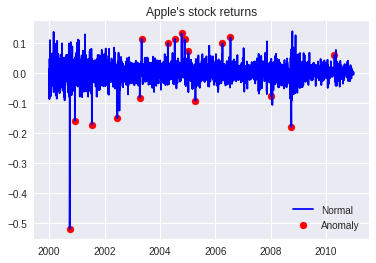

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
# plt.savefig('images/ch1_im9.png')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_outliers.index, y=df_outliers.simple_rtn,
                    mode='lines',
                    name='Normal'))
fig.add_trace(go.Scatter(x=outliers.index, y= outliers.simple_rtn,
                    mode='markers', name='Outlier'))

fig.show()

In the plot, we can observe outliers marked with a red dot. One thing to notice is
that when there are two large returns in the vicinity, the algorithm identifies the
first one as an outlier and the second one as a regular observation. This might be
due to the fact that the first outlier enters the rolling window and affects the
moving average/standard deviation.

We should also be aware of the so-called ghost effect/feature. When a
single outlier enters the rolling window, it inflates the values of the rolling
statistics for as long as it is in the window.

There's more...
There are many different methods of identifying outliers in a time series, for example, using
Isolation Forest, Hampel Filter, Support Vector Machines, and z-score (which is similar to
the presented approach).

### Isolation forest

https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest

In [ ]:
sample=df['simple_rtn'].to_frame().dropna()
sample

,simple_rtn
Date,
2000-01-04,-0.084310
2000-01-05,0.014634
2000-01-06,-0.086539
2000-01-07,0.047368
2000-01-10,-0.017588
...,...
2010-12-23,-0.004798
2010-12-27,0.003338
2010-12-28,0.002433


In [ ]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=20,random_state=42,
                      contamination=float(.1), # max percent outlier
                      )
clf.fit(sample)

pred = clf.predict(sample)
sample['anomaly']=pred
outliers=sample.loc[sample['anomaly']==-1]
outliers

,simple_rtn,anomaly
Date,,
2000-01-04,-0.084310,-1
2000-01-06,-0.086539,-1
2000-01-11,-0.051151,-1
2000-01-12,-0.059973,-1
2000-01-13,0.109678,-1
...,...,...
2009-05-26,0.067592,-1
2010-01-22,-0.049599,-1
2010-04-21,0.059815,-1


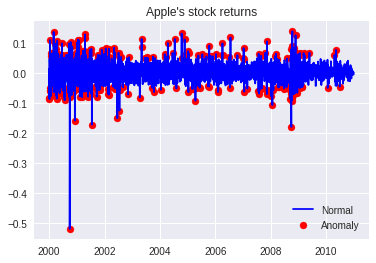

In [ ]:
fig, ax = plt.subplots()

ax.plot(sample.index, sample.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
# plt.savefig('images/ch1_im9.png')
plt.show()

In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=sample.index, y=sample.simple_rtn,
                    mode='lines',
                    name='Normal'))
fig.add_trace(go.Scatter(x=outliers.index, y= outliers.simple_rtn,
                    mode='markers', name='Outlier'))

fig.show()

### Local Outlier Factor (LOF)

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py

In [ ]:
sample.head()

,simple_rtn,anomaly
Date,,
2000-01-04,-0.084310,-1
2000-01-05,0.014634,1
2000-01-06,-0.086539,-1
2000-01-07,0.047368,1
2000-01-10,-0.017588,1


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = clf.fit_predict(sample)
sample['anomaly']=pred
outliers=sample.loc[sample['anomaly']==-1]
outliers

,simple_rtn,anomaly
Date,,
2000-01-04,-0.084310,-1
2000-01-06,-0.086539,-1
2000-02-07,0.056134,-1
2000-02-17,0.006572,-1
2000-03-01,0.136860,-1
...,...,...
2010-10-07,0.000104,-1
2010-10-14,0.007230,-1
2010-10-29,-0.013956,-1


In [ ]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=sample.index, y=sample.simple_rtn,
                    mode='lines',
                    name='Normal'))
fig.add_trace(go.Scatter(x=outliers.index, y= outliers.simple_rtn,
                    mode='markers', name='Outlier'))

fig.show()

### Check all outlier detection

In [72]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

sample=df['simple_rtn'].to_frame().dropna()
X=sample.copy()
# Example settings
n_samples = X.shape[0]
outliers_fraction = 0.1 #0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]


In [73]:
for name, algorithm in anomaly_algorithms:
  # fit the data and tag outliers
  if name == "Local Outlier Factor":
      y_pred = algorithm.fit_predict(X)
  else:
      y_pred = algorithm.fit(X).predict(X)
  X['anomaly'+name]=pred

In [87]:
for name in X.columns[1:]:
  outliers=X.loc[X[name]==-1]
  print('Outlier method: ',name)
  print('Number: ',len(outliers))
  # Create traces
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=X.index, y=X[X.columns[0]],
                      mode='lines',
                      name='Normal'))
  fig.add_trace(go.Scatter(x=outliers.index, y= outliers[outliers.columns[0]],
                      mode='markers', name=name))

  fig.show()

Outlier method:  anomalyRobust covariance
Number:  277


Outlier method:  anomalyOne-Class SVM
Number:  277


Outlier method:  anomalyIsolation Forest
Number:  277


Outlier method:  anomalyLocal Outlier Factor
Number:  277


3 Sigma method

In [88]:
def indentify_outliers_3sigma(df,window=21):

  df_rolling = df.rolling(window).agg(['mean', 'std'])
  df_rolling.columns = df_rolling.columns.droplevel()
  df_outliers = df.join(df_rolling)

  def indentify_outliers(row, n_sigmas=3):
      x = row['simple_rtn']
      mu = row['mean']
      sigma = row['std']
      
      if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
          return -1
      else:
          return 1 
      # explain: nếu simple_return hiện tại nằm ngoài 3 sigma của 20 ngày gần kề (1 tháng) thì đó là outlier

  df_outliers['anomaly_3sigma'] = df_outliers.apply(indentify_outliers,axis=1)
  return df_outliers

In [95]:
outlier_3sigma=indentify_outliers_3sigma(sample,21)
outliers=outlier_3sigma.loc[outlier_3sigma[outlier_3sigma.columns[3]]==-1]
print('Outlier method: ','3sigma')
print('Number: ',len(outliers))
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=outlier_3sigma.index, y=outlier_3sigma[outlier_3sigma.columns[0]],
                    mode='lines',
                    name='Normal'))
fig.add_trace(go.Scatter(x=outliers.index, y= outliers[outliers.columns[0]],
                    mode='markers', name='3 sigma outlier'))

fig.show()

Outlier method:  3sigma
Number:  17


## Investigating stylized facts of asset returns

### How to do it...

1. Import the libraries:

In [96]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

2. Download the S&P 500 data and calculate the returns:

In [107]:
df = yf.download('^GSPC', 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')
df

,adj_close,log_rtn
Date,,
1985-01-03,164.570007,-0.004849
1985-01-04,163.679993,-0.005423
1985-01-07,164.240005,0.003416
1985-01-08,163.990005,-0.001523
1985-01-09,165.179993,0.007230
...,...,...
2018-12-21,2416.620117,-0.020803
2018-12-24,2351.100098,-0.027487
2018-12-26,2467.699951,0.048403


#### Fact 1 - Non-Gaussian distribution of returns

In [109]:
df.describe()

,adj_close,log_rtn
count,8568.000000,8568.000000
mean,1069.883128,0.000316
std,655.125102,0.011273
min,163.679993,-0.228997
25%,447.762497,-0.004317
50%,1098.769958,0.000587
75%,1394.359985,0.005546
max,2930.750000,0.109572


1. Calculate the Normal PDF using the mean and standard deviation of the observed returns:

In [ ]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

2. Plot the histogram and the Q-Q Plot:

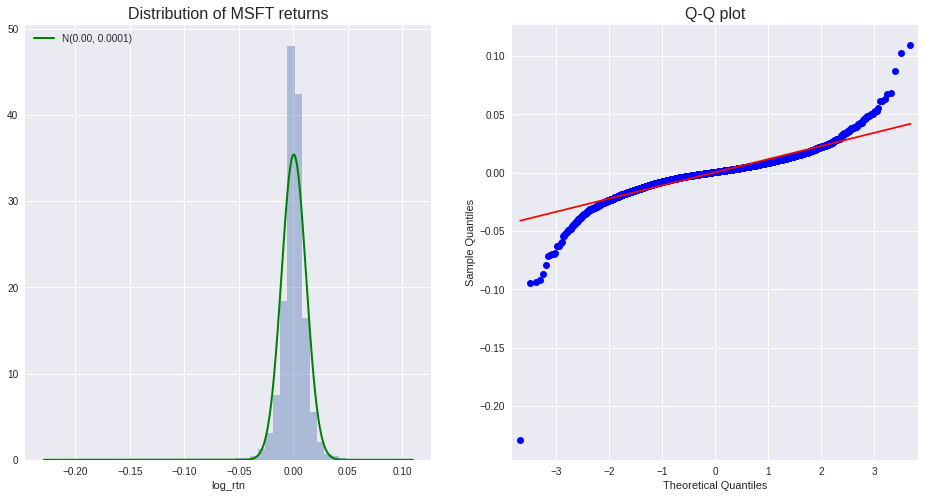

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of MSFT returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

3. Print the summary statistics of the log returns:

In [112]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera statistic: 282134.38 with p-value: 0.00


- Skewness of the normal distribution is zero.

- Kurtosis of the normal distribution is 3.0. While measuring the departure from normality, Kurtosis is sometimes expressed as excess Kurtosis which is the balance amount of Kurtosis after subtracting 3.0.

- In general, a large J-B value indicates that errors are not normally distributed, if p value < 0.05 reject hypothesis (data is not normally)

By looking at the metrics such as the mean, standard deviation, skewness, and
kurtosis we can infer that they deviate from what we would expect under
normality. Additionally, the Jarque-Bera normality test gives us reason to reject
the null hypothesis stating that the distribution is normal at the 99% confidence
level.

#### Fact 2 - Volatility Clustering

1. Run the following code to visualize the log returns series:

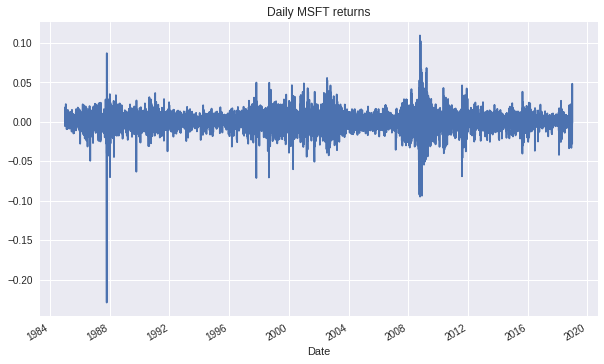

In [113]:
df.log_rtn.plot(title='Daily MSFT returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

We can observe clear clusters of volatility—periods of higher positive and
negative returns.

#### Fact 3 - Absence of autocorrelation in returns

1. Define the parameters for creating the Autocorrelation plots:

In [114]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

2. Run the following code to create ACF plot of log returns:

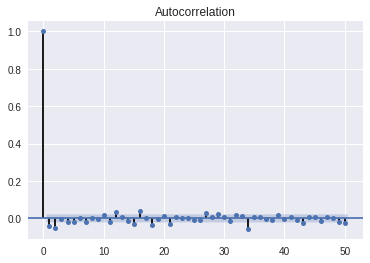

In [115]:
acf = smt.graphics.plot_acf(df.log_rtn, 
                            lags=N_LAGS, 
                            alpha=SIGNIFICANCE_LEVEL)

# plt.tight_layout()
# plt.savefig('images/ch1_im13.png')
plt.show()

Autocorrelation (also known as serial correlation) measures how similar is a given time
series to the lagged version of itself, over successive time intervals. To investigate whether there is significant autocorrelation in returns, we created the
autocorrelation plot using plot_acf from the statsmodels library. We inspected 50 lags
and used the default alpha=0.05, which means that we also plotted the 95% confidence
interval. Values outside of this interval can be considered statistically significant.

Only a few values lie outside the confidence interval (we do not look at lag 0) and
can be considered statistically significant. We can assume that we have verified
that there is no autocorrelation in the log returns series

#### Fact 4 - Small and decreasing autocorrelation in squared/absolute returns

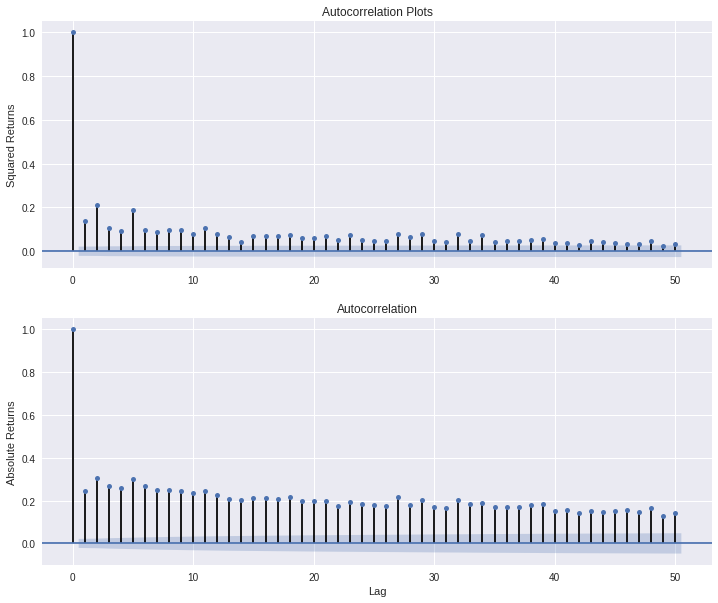

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
          ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
          xlabel='Lag')

# plt.tight_layout()
# plt.savefig('images/ch1_im14.png')
plt.show()

#### Fact 5 - Leverage effect

1. Calculate volatility measures as moving standard deviations

In [117]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

2. Plot all the series:

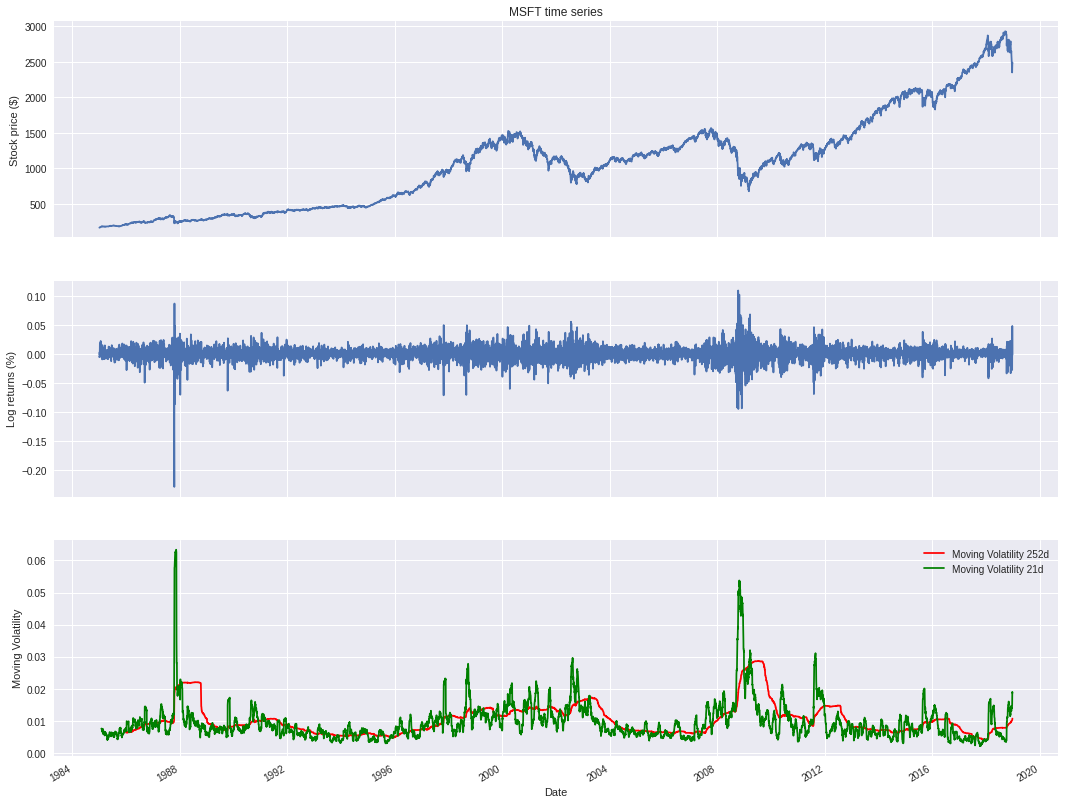

In [118]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15), 
                       sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',
          ylabel='Stock price ($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', 
                       label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g', 
                      label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
          xlabel='Date')
ax[2].legend()

# plt.tight_layout()
# plt.savefig('images/ch1_im15.png')
plt.show()

This fact states that most measures of an asset's volatility are negatively correlated
with its returns, and we can indeed observe a pattern of increased volatility when
the prices go down and decreased volatility when they are rising

### There's more

1. Download and preprocess the prices of S&P 500 and VIX:

In [119]:
df = yf.download(['^GSPC', '^VIX'], 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

2. Calculate log returns:

In [120]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

In [121]:
df

,sp500,vix,log_rtn,vol_rtn
Date,,,,
1990-01-03,358.760010,18.190001,-0.002589,0.053640
1990-01-04,355.670013,19.219999,-0.008650,0.055079
1990-01-05,352.200012,20.110001,-0.009804,0.045266
1990-01-08,353.790009,20.260000,0.004504,0.007431
1990-01-09,349.619995,22.200001,-0.011857,0.091444
...,...,...,...,...
2018-12-21,2416.620117,30.110001,-0.020803,0.059173
2018-12-24,2351.100098,36.070000,-0.027487,0.180604
2018-12-26,2467.699951,30.410000,0.048403,-0.170690


3. Plot a scatterplot with the returns on the axes and fit a regression line to identify trend:

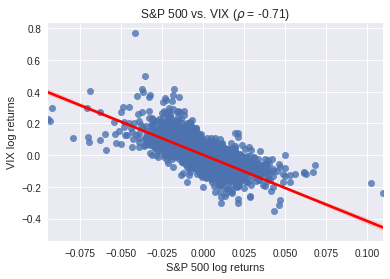

In [122]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df, 
                 line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
       ylabel='VIX log returns',
       xlabel='S&P 500 log returns')

# plt.tight_layout()
# plt.savefig('images/ch1_im16.png')
plt.show()

We can see that both the negative slope of the regression line and a strong
negative correlation between the two series confirm the existence of the leverage
effect in the return series.